**Electricity Generation Data - 1st semester 2020**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# File path
file_path = '/content/drive/My Drive/Colab Notebooks/CSD Generation (Hourly) - 2020-01 to 2020-06.csv'

# Read the CSV file
data = pd.read_csv(file_path)

# Convert 'Date (MST)' column to datetime
data['Date (MST)'] = pd.to_datetime(data['Date (MST)'])

# Aggregate electricity volume for each day
daily_generation = data.groupby(data['Date (MST)'].dt.date)['Volume'].sum()

# Convert the resulting Series to a DataFrame
daily_generation_df = pd.DataFrame({'Date': daily_generation.index, 'Daily Generation (MWh)': daily_generation.values})

# Plot the total electricity volume regardless of fuel type
plt.figure(figsize=(12, 6))

# Plot the line for total electricity generation
plt.plot(daily_generation_df['Date'], daily_generation_df['Daily Generation (MWh)'], color='blue', label='Total Electricity Volume')

# Fill the area under the curve with a specific color
plt.fill_between(daily_generation_df['Date'], daily_generation_df['Daily Generation (MWh)'], color='lightblue', alpha=0.3)

plt.title('Total Electricity Volume')
plt.xlabel('Date')
plt.ylabel('Electricity Generation (MWh)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Plot the contribution of each fuel type to daily electricity generation as an area plot
plt.figure(figsize=(12, 6))
sns.set_palette("tab10")  # Use the tab10 color palette
sns.set_style("whitegrid")  # Set style to whitegrid for better readability
fuel_type_pivot.plot.area()
plt.title('Contribution of Each Fuel Type to Daily Electricity Generation')
plt.xlabel('Date')
plt.ylabel('Electricity Generation (MWh)')
plt.xticks(rotation=45)
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\gaoqian\AppData\Local\Temp\ipykernel_38800\2613537480.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ModuleNotFoundError: No module named 'google'

**Electricity Generation profiles - 2015-2023**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Figure size 1200x600 with 0 Axes>

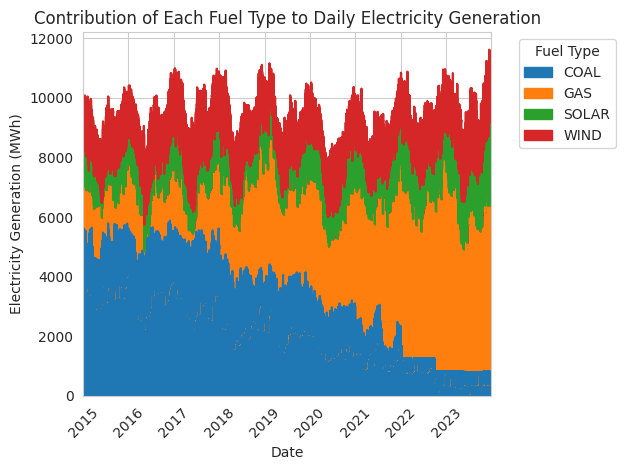

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# File paths
file_paths = ['/content/drive/My Drive/Colab Notebooks/CSD Generation (Hourly) - 2015-01 to 2015-06.csv',
              '/content/drive/My Drive/Colab Notebooks/CSD Generation (Hourly) - 2015-07 to 2015-12.csv',
              '/content/drive/My Drive/Colab Notebooks/CSD Generation (Hourly) - 2016-01 to 2016-06.csv',
              '/content/drive/My Drive/Colab Notebooks/CSD Generation (Hourly) - 2016-07 to 2016-12.csv',
                '/content/drive/My Drive/Colab Notebooks/CSD Generation (Hourly) - 2017-01 to 2017-06.csv',
              '/content/drive/My Drive/Colab Notebooks/CSD Generation (Hourly) - 2017-07 to 2017-12.csv',
               '/content/drive/My Drive/Colab Notebooks/CSD Generation (Hourly) - 2018-01 to 2018-06.csv',
              '/content/drive/My Drive/Colab Notebooks/CSD Generation (Hourly) - 2018-07 to 2018-12.csv',
               '/content/drive/My Drive/Colab Notebooks/CSD Generation (Hourly) - 2019-01 to 2019-06.csv',
              '/content/drive/My Drive/Colab Notebooks/CSD Generation (Hourly) - 2019-07 to 2019-12.csv',
              '/content/drive/My Drive/Colab Notebooks/CSD Generation (Hourly) - 2020-01 to 2020-06.csv',
              '/content/drive/My Drive/Colab Notebooks/CSD Generation (Hourly) - 2020-07 to 2020-12.csv',
              '/content/drive/My Drive/Colab Notebooks/CSD Generation (Hourly) - 2021-01 to 2021-06.csv',
              '/content/drive/My Drive/Colab Notebooks/CSD Generation (Hourly) - 2021-07 to 2021-12.csv',
              '/content/drive/My Drive/Colab Notebooks/CSD Generation (Hourly) - 2022-01 to 2022-06.csv',
              '/content/drive/My Drive/Colab Notebooks/CSD Generation (Hourly) - 2022-07 to 2022-12.csv',
              '/content/drive/My Drive/Colab Notebooks/CSD Generation (Hourly) - 2023-01 to 2023-06.csv',
              '/content/drive/My Drive/Colab Notebooks/CSD Generation (Hourly) - 2023-07 to 2023-12.csv'
             ]

# Initialize an empty DataFrame to store aggregated data
agg_data = pd.DataFrame()

# Read and aggregate data from each file
for file_path in file_paths:
    # Read the CSV file
    data = pd.read_csv(file_path)

    # Convert 'Date (MST)' column to datetime
    data['Date (MST)'] = pd.to_datetime(data['Date (MST)'])

    # Filter out specific fuel types
    selected_fuels = ['COAL', 'GAS', 'WIND', 'SOLAR']
    filtered_df = data[data['Fuel Type'].isin(selected_fuels)]

    # Remove negative values from the 'SOLAR' column
    filtered_df = filtered_df[filtered_df['Fuel Type'] != 'SOLAR']
    filtered_df = pd.concat([filtered_df, data[(data['Fuel Type'] == 'SOLAR') & (data['Volume'] >= 0)]])

    # Aggregate daily generation by date and fuel type
    daily_generation_by_fuel_type = filtered_df.groupby(['Date (MST)', 'Fuel Type'])['Volume'].sum().reset_index()
    agg_data = pd.concat([agg_data, daily_generation_by_fuel_type])

# Pivot the aggregated DataFrame
fuel_type_pivot = agg_data.pivot(index='Date (MST)', columns='Fuel Type', values='Volume')

# Plot the contribution of each fuel type to daily electricity generation as an area plot
plt.figure(figsize=(12, 6))
sns.set_palette("tab10")  # Use the tab10 color palette
sns.set_style("whitegrid")  # Set style to whitegrid for better readability
fuel_type_pivot.plot.area()
plt.title('Contribution of Each Fuel Type to Daily Electricity Generation')
plt.xlabel('Date')
plt.ylabel('Electricity Generation (MWh)')
plt.xticks(rotation=45)
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Optimizing years iteration


In [ ]:

import os


# Define the directory containing the files
directory = '/content/drive/My Drive/Colab Notebooks/'

# Create an empty DataFrame to store aggregated data
agg_data = pd.DataFrame()

# Iterate over files in the directory
for file_name in os.listdir(directory):
    if file_name.startswith('CSD Generation (Hourly)'):
        file_path = os.path.join(directory, file_name)

        # Read the csv file
        data = pd.read_csv(file_path)

        # Convert 'Date (MST)' column to datetime
        data['Date (MST)'] = pd.to_datetime(data['Date (MST)'])

        # Filter out specific fuel types
        selected_fuels = ['COAL', 'GAS', 'WIND', 'SOLAR']
        filtered_df = data[data['Fuel Type'].isin(selected_fuels)]

        # Remove negative values from the 'SOLAR' column
        filtered_df = filtered_df[filtered_df['Fuel Type'] != 'SOLAR']
        filtered_df = pd.concat([filtered_df, data[(data['Fuel Type'] == 'SOLAR') & (data['Volume'] >= 0)]])

# Rearrange the aggregated DataFrame
fuel_type_pivot = agg_data.pivot(index='Date (MST)', columns='Fuel Type', values='Volume')

# Plot the total electricity volume regardless of fuel type
plt.figure(figsize=(12, 6))
total_generation = agg_data.groupby('Date (MST)')['Volume'].sum().reset_index()
plt.plot(total_generation['Date (MST)'], total_generation['Volume'], color='black', label='Total Electricity Volume')
plt.title('Total Electricity Volume Regardless of Fuel Type')
plt.xlabel('Date')
plt.ylabel('Electricity Generation (MWh)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot the contribution of each fuel type to daily electricity generation as an area plot
plt.figure(figsize=(12, 6))
sns.set_palette("tab10")  # Use the tab10 color palette
sns.set_style("whitegrid")  # Set style to whitegrid for better readability
fuel_type_pivot.plot.area()
plt.title('Contribution of Each Fuel Type to Daily Electricity Generation')
plt.xlabel('Date')
plt.ylabel('Electricity Generation (MWh)')
plt.xticks(rotation=45)
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



KeyError: 'Date (MST)'

In [ ]:
data.columns

Index(['Date (MST)', 'Date (MPT)', 'Asset Short Name', 'Asset Name',
       'Asset Grouping', 'Volume', 'Maximum Capability', 'System Capability',
       'Fuel Type', 'Sub Fuel Type', 'Planning Area', 'Region'],
      dtype='object')